<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/Get_hands_on_with_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, A Computer VIsion Example

10가지 다른 유형을 포함한 Dataset에서 학습된 다양한 의류들을 인식하는 시나리오를 확인해 보도록 하자.

# Start Coding

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


keras에 내장되어있는 Fashion Mnist data를 사용해보도록 하자.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth = 200)

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

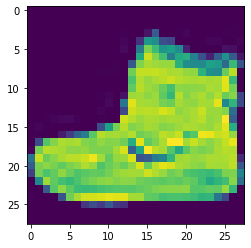

In [ ]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

0과 1 사이의 값으로 만들어 주기 위해(정규화) 255를 나누어서 사용하도록 하자.

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                     tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

* **Sequential** : Neural Network의 layer들의 Sequence를 정의한다.
* **Flatten** : 위에서 네모 모양으로 나와있는 숫자들을 1차원 배열로 바꿔주는 것이다.
* **Dense** : Neurons의 Layer를 추가한다. 앞에 있는 수는 unit의 숫자이며 각 Layer에는 Activation Function을 넣어준다.

모델이 정의 됬으므로 다음으로 실제로 구축을 진행하도록 한다.  
optimizer와 loss function과 함께 `model.compile`을 이용하여 실행하자.  
그 후 `model.fit`으로 모델을 훈련시킨다.

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6316 - accuracy: 0.7821
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3843 - accuracy: 0.8599
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3305 - accuracy: 0.8791
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3091 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2914 - accuracy: 0.8948


test data를 이용하여 약 90%의 정확도로 옳게 판단되는지 확인해보도록 하자.

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8757


[0.34555959701538086, 0.8756999969482422]

다음은 아래 Exercise와 비교하기 위하여 accuracy가 아니라 loss로 출력한 것이다.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs = 5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4316
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1204
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0750
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0587
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0705
[1.16775880e-07 1.09897896e-10 1.56297392e-05 7.90588019e-05 2.85487367e-12 5.02794784e-09 3.71845702e-14 9.99900341e-01 3.09171037e-06 1.83956627e-06]
7


# Exploration Exercises

## Exercise 1 :

첫 번째 Exercise에서는 test image들을 분류하여 set을 만들고 분류된 첫 번째 set을 print한다.

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

[8.5398381e-07 2.2745932e-07 1.8986024e-07 1.4316159e-07 1.5190869e-06 1.3592656e-01 3.1658965e-07 2.0593366e-02 1.5905008e-04 8.4331781e-01]


In [ ]:
print(test_labels)

[9 2 1 ... 8 1 5]


list인 classificiations은 10개의 항목들이 각각 제대로 분류되어질 확률이다.

## Exercise 2 :

Dense Layer에서 neuronse의 수를 1024개로 늘려보도록하자.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs = 5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3095
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0738
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0458
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0333
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0724
[4.5014860e-12 5.3414989e-12 1.3450636e-09 4.3426451e-10 8.9264804e-15 8.8708563e-12 7.8040639e-17 1.0000000e+00 2.6748213e-12 6.3009525e-10]
7


## Excercise 3 :

Flatten코드가 없어진다면 어떻게 되는지 확인해보도록 하자.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs = 5)

model.evaluate(test_images, test_lables)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/5


ValueError: ignored

Flatten 코드가 없으면 1차원으로 변경이 되지 않아서 오류가 나오게 된다. 이점 참고하여 꼭 Flatten코드를 실행시켜주도록 하자.

## Excercise 4 :

output layer에서 분류를 5개로 주면 어떻게 될까?  
test_labels에 10개의 분류로 나눠져 있으므로 softmax를 10개로 주어야 한다.  
코드를 실행해서 오류가 나오는지 확인해 보도록 하자.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labelsd) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation = tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs = 5)
model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/5


InvalidArgumentError: ignored

## Excercise 5:

layer가 하나 더 늘어나면 어떻게 될까?

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images,training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
313/313 [==============================] - 1s 2ms/step - loss: 0.0997
[2.5951559e-08 1.4586856e-06 2.3009323e-05 6.0341114e-05 3.4705085e-09 6.1572797e-07 4.7687014e-11 9.9987137e-01 9.7778752e-07 4.2315056e-05]
7


성능이 더 좋아지는 것은 거즘 사실이지만 현 데이터에서 큰 변화가 안보이는 이유는 데이터가 매우 단순하기 떄문이다.

## Excercise 6:

이번에는 반복수를 조정해서 결과가 어떻게 변하는지 알아보도록 하자.

단, 반복수를 조정할 때는 'Overfitting'이 발생할 수도 있으니 이 점을 유의하며 진행하도록 하자.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs = 30)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4319
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1244
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0795
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0557
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0411
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0319
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0245
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0204
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0155
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0150
Epoch 11/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0117
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.

epochs가 5일 때에 비해서 training set에서는 loss값이 현저히 작은 걸 볼 수 있으나 test set에서는 그 값이 역전되어있다.  
즉, overfit이 되어있음을 짐작할 수 있다.

## Excercise 7 :

정규화를 하지 않는다면 결과값이 어떻게 달라질까?

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs = 5)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 7.4964
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3977
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2722
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2337
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2496
[7.5483145e-30 1.1615493e-13 3.1799419e-10 1.8519450e-10 1.1230044e-25 8.2973583e-21 0.0000000e+00 1.0000000e+00 1.1141761e-17 1.9065073e-12]
7


정규화를 하지 않은 것보다 loss값이 크게 증가되어있는 것을 볼 수 있다.

## Excercise 8:

우리가 원하는 정확도 수치를 넘었을 때 반복을 정지하도록 할 수 있는 방법을 알아보자.

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self, epoch, logs = {}) :
    if(logs.get('accuracy') > 0.6) :
      print('\nReached 60% accuracy so cancelling training!')
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
model.fit(training_images, training_labels, epochs = 50, callbacks = [callbacks])

2.4.0
Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4475 - accuracy: 0.8740

Reached 60% accuracy so cancelling training!
